In [1]:
using Distances
using DataStructures
using TextModel
using SimilaritySearch
using JSON
using PyCall
using PyPlot
using Interact
@pyimport sklearn.datasets as datagen
include("../src/fft.jl")

  likely near /Users/sadit/.julia/v0.6/TextAnalysis/src/stemmer.jl:1


fft (generic function with 2 methods)

In [2]:
function plot_clusters(data,labels,centers)
    colors=["ro","bo","go","mo","co","yo",
        "r^","b^","g^","m^","c^","y^",
        "r*","b*","g*","m*","c*","y*"]
    ci=1
    for l in Set(labels)
        ind=[i for (i,v) in enumerate(labels) if v==l]
        plot(data[ind,1],data[ind,2], colors[ci])
        ci=ci+1
    end
    plot(data[centers,1],data[centers,2], "k8", markersize=10)
end

plot_clusters (generic function with 1 method)

In [3]:
function lassign(data,centers)
    labels=[]
    for i in 1:length(data[:,1]) 
        x=data[i,:]
        dist=sort([(evaluate(Euclidean(), x,data[c,:]),c) for c in centers])
        push!(labels,dist[1][2])
    end
    return labels
end

lassign (generic function with 1 method)

In [4]:
function ffte(data,k::Int64)
    n=length(data[:,1])
    dst=KnnResult(n)
    c=rand(1:n)
    centers=[c]
    [push!(dst,i,Inf) for i in 1:n if i!=c] 
    while length(centers)<k
        dstn=KnnResult(n)
        c=last(centers)
        for nn in dst
            d=evaluate(Euclidean(), data[c,:],data[nn.objID,:])
            d = d<nn.dist ? d : nn.dist
            push!(dstn,nn.objID,d)
        end
        fn=pop!(dstn)
        dst=dstn
        push!(centers,fn.objID)
    end
    labels= lassign(data,centers)
    return centers, labels               
end

ffte (generic function with 1 method)

In [5]:
function fftp(data,k::Int64)
    n=length(data[:,1])
    c=rand(1:n)
    centers=[c]
    partitions=[c for i in 1:n]
    while length(centers)<k
        res=KnnResult(length(centers))
        for c in centers
            ind=[(i,l) for (i,l) in enumerate(partitions) if l==c]
            dist=sort([(evaluate(Euclidean(), data[c],data[i]),i) for (i,x) in ind])
            push!(res,last(dist)[2],last(dist)[1])
        end
        push!(centers,last(res).objID) 
        partitions = lassign(data,centers)
    end
    return centers,partitions              
end

fftp (generic function with 1 method)

In [6]:
r,y=datagen.make_blobs(n_samples=2000,centers=5);

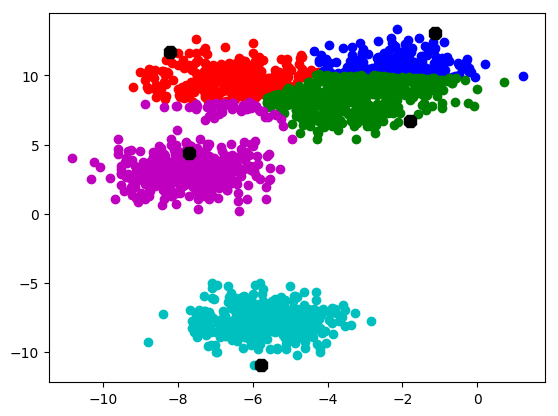

5-element Array{Int64,1}:
 1872
  684
 1913
  642
  287

In [7]:
centros,lb=ffte(r,5);
plot_clusters(r,lb,centros)
centros

In [8]:
r1,y1 = datagen.make_moons(n_samples=1000,noise=0.1)

([0.00501412 0.926556; -0.357845 1.08293; … ; 1.08647 0.0521517; 0.344645 0.826629], [0, 0, 1, 1, 0, 1, 1, 1, 1, 1  …  1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

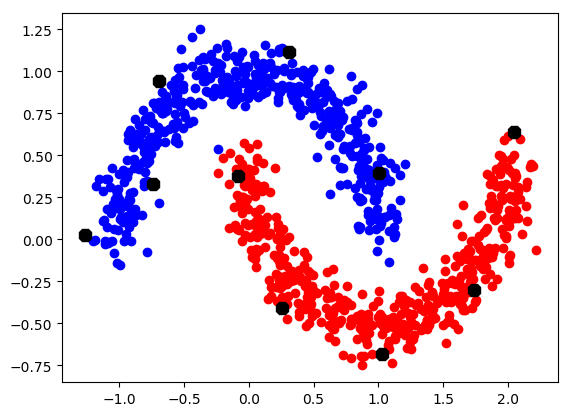

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13c277990>

In [9]:
centros1,lb1=ffte(r1,10);
plot_clusters(r1,y1,centros1)

In [10]:
include("../src/fft.jl")

fft (generic function with 2 methods)

In [11]:
config=TextConfig(stem=true, del_sw=true, lang=Languages.SpanishLanguage)
config.nlist = [0]
config.qlist = []
config.skiplist = []
tweets,vbows=list_of_items("../data/test.json","text",config);

In [12]:
c=fft(vbows[1:100],tweets[1:100],config,"text","3","maxmin")

>>>>>>>>>>>>>>> 81 0.0 9
>>>>>>>>>>>>>>> 76 0.0 8
>>>>>>>>>>>>>>> 72 0.0 7
>>>>>>>>>>>>>>> 92 0.0 25
>>>>>>>>>>>>>>> 89 0.0 24
>>>>>>>>>>>>>>> 87 0.0 23
>>>>>>>>>>>>>>> 100 0.0 60
>>>>>>>>>>>>>>> 99 0.0 59
>>>>>>>>>>>>>>> 98 0.0 58


12-element Array{Any,1}:
  61
  81
  76
  72
  15
  92
  89
  87
   1
 100
  99
  98

In [13]:
c1=fft(vbows[1:100],tweets[1:100],config,"text","3","approx_maxmin")

>>>>>> Length: 1
Any[37]
>>>>>>>>>>>> DataStructures.PriorityQueue(2=>-1.0)
>>>>>> Length: 2
Any[37, 33]
>>>>>>>>>>>> DataStructures.PriorityQueue(2=>-0.0,1=>-0.0)
>>>>>> Length: 3
Any[37, 33, 7]
>>>>>>>>>>>> DataStructures.PriorityQueue(2=>-0.0,1=>-0.0)


LoadError: [91mBoundsError: attempt to access 0-element Array{Pair{Int64,Float64},1} at index [1][39m